In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dimensionality Reduction

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
heart_disease = pd.read_csv('Heart_disease_cleveland_new.csv')
heart_disease.head()

https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland/

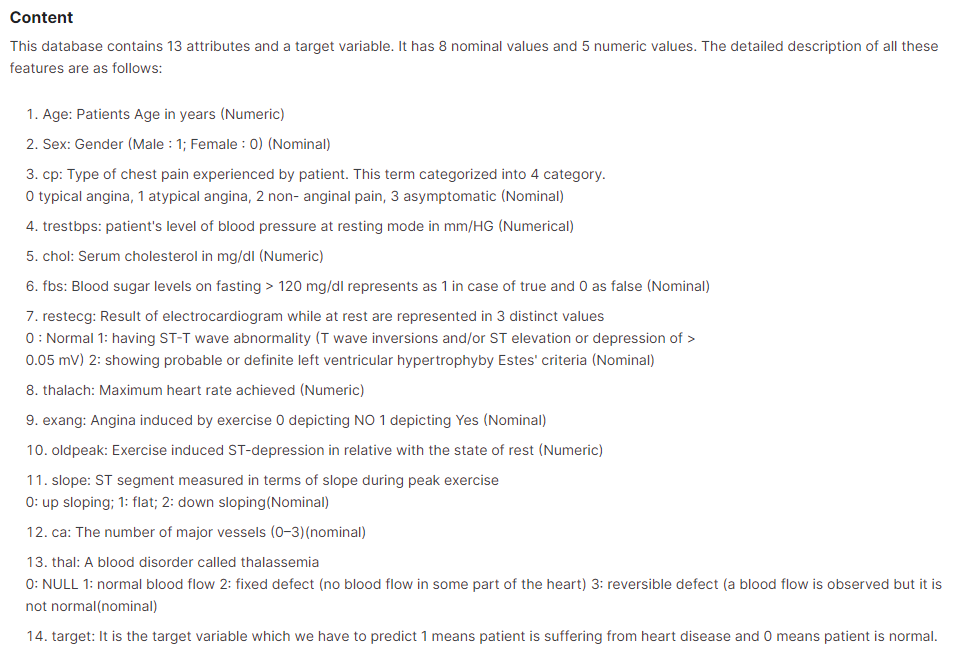

### Task
Visualize the dataset in a low-dimensional feature space (two dimensions)

In [ ]:
X_heart = heart_disease.drop('target', axis=1)
y_heart = heart_disease['target']

In [ ]:
# apply PCA
pca = PCA(n_components=2)
X_heart_pca = pca.fit_transform(X_heart)

# plot the data
import matplotlib.pyplot as plt
plt.scatter(X_heart_pca[:,0], X_heart_pca[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalize data but only the numerical columns (Age, trestbps, chol, thalach, oldpeak)
X_heart_standardized = X_heart.copy()
X_heart_standardized[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_heart_standardized.head()

In [ ]:
# apply PCA
pca = PCA(n_components=2)
X_heart_pca_standardized = pca.fit_transform(X_heart)
X_heart_pca_standardized = pca.fit_transform(X_heart_standardized)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X_heart_pca[:,0], X_heart_pca[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Without standardization')
plt.subplot(122)
plt.scatter(X_heart_pca_standardized[:,0], 
            X_heart_pca_standardized[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With standardization')
plt.show()

We can also calculate the PCA manually

In [ ]:
def get_cov_matrix(X):
    X_mean = np.mean(X, axis=0)
    X = X - X_mean
    cov_matrix = np.dot(X.T, X) / (X.shape[0]-1)
    return cov_matrix

def get_cov_matrix_np(X):
    cov_matrix = np.cov(X.T)
    return cov_matrix

cov_mat = get_cov_matrix(X_heart)
cov_mat_np = get_cov_matrix_np(X_heart)

np.allclose(cov_mat, cov_mat_np)

In [ ]:
def get_eigen(cov_matrix):
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    return eigen_values, eigen_vectors

eigen_values, eigen_vectors = get_eigen(cov_mat)
print(eigen_values)
print(eigen_vectors.shape)

In [ ]:
def get_sorted_eig_pairs(eigen_values, eigen_vectors):
    eigen_pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(len(eigen_values))]
    eigen_pairs.sort(reverse=True)
    return eigen_pairs

eigen_pairs = get_sorted_eig_pairs(eigen_values, eigen_vectors)
print(eigen_pairs[0])

### Explained variance:
- Statistical metric that measures the proportion of the total variance in a dataset that is captured or "explained" by a particular set of variables or components
- Explained variance by each principal component is represented by its corresponding eigenvalue
- Explained variance ratio for a principal component is the ratio of its eigenvalue to the sum of all eigenvalues
- Provides insights into the importance of each principal component. Components with higher explained variance are more influential in describing the underlying structure of the data
- A high cumulative explained variance suggests that the selected principal components effectively capture the variability in the data, allowing for meaningful dimensionality reduction

In [ ]:
def get_explained_variance(eigen_values):
    total = sum(eigen_values)
    explained_variance = [(i / total)*100 for i in sorted(eigen_values, reverse=True)]
    return explained_variance

explained_variance = get_explained_variance(eigen_values)
print(explained_variance)

plt.bar(range(13), explained_variance, alpha=0.5, 
        align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
# create Scree plot
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
def get_projection_matrix(eigen_pairs, n_components):
    projection_matrix = np.hstack((eigen_pairs[i][1].reshape(13,1) for i in range(n_components)))
    return projection_matrix

projection_matrix = get_projection_matrix(eigen_pairs, 2)
print(projection_matrix.shape)

In [ ]:
def get_PCA(X, n_components):
    cov_mat = get_cov_matrix(X)
    eigen_values, eigen_vectors = get_eigen(cov_mat)
    eigen_pairs = get_sorted_eig_pairs(eigen_values, eigen_vectors)
    projection_matrix = get_projection_matrix(eigen_pairs, n_components)
    X_pca = np.dot(X, projection_matrix)
    return X_pca

In [ ]:
X_heart_pca = get_PCA(X_heart, 2)
X_heart_pca_standardized = get_PCA(X_heart_standardized, 2)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_heart_pca[:,0], X_heart_pca[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Without standardization')

plt.subplot(1,2,2)
plt.scatter(X_heart_pca_standardized[:,0] * -1, 
            X_heart_pca_standardized[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With standardization')
plt.show()


### Use SVD for PCA instead of eigendecomposition

In [ ]:
def get_PCA_svd(X, n_components):
    X_mean = np.mean(X, axis=0)
    X = X - X_mean
    U, S, V = np.linalg.svd(X)
    X_pca = np.dot(X, V.T[:,:n_components])
    return X_pca

X_heart_pca = get_PCA_svd(X_heart, 2)
X_heart_pca_standardized = get_PCA_svd(X_heart_standardized, 2)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_heart_pca[:,0] * -1, X_heart_pca[:,1], c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Without standardization')

plt.subplot(1,2,2)
plt.scatter(X_heart_pca_standardized[:,0] * -1, 
            X_heart_pca_standardized[:,1] * -1, c=y_heart)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With standardization')
plt.show()

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Create an instance of the TSNE class
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(X_heart)
X_tsne_standardized = tsne.fit_transform(X_heart_standardized)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_heart)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Without standardization')

plt.subplot(1,2,2)
plt.scatter(X_tsne_standardized[:,0], 
            X_tsne_standardized[:,1], c=y_heart)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('With standardization')
plt.show()


## UMAP

In [ ]:
# apply UMAP to the data
import umap
X_umap = umap.UMAP(n_components=2, random_state=42)
.fit_transform(X_heart_standardized)

# plot the data
plt.scatter(X_umap[:,0], X_umap[:,1], c=y_heart)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# Statistic

We now look at the ages of all patients with and without heart disease

In [ ]:
# plot histograms
plt.hist(X_heart['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

heart_disease[heart_disease['target'] == 0]['age']
.hist(alpha=0.5, bins=20)
heart_disease[heart_disease['target'] == 1]['age']
.hist(alpha=0.5, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No disease', 'Disease'])
plt.show()

In [ ]:
heart_disease.boxplot(column='age', by='target')
plt.show()

QQ-Plots

In [ ]:
import statsmodels.api as sm

# create dummy variables
test = np.random.normal(0, 1, 1000)

sm.qqplot(test, line='45')
plt.show()

In [ ]:
# --> if the data is normally distributed, the points should be on the red line
sm.qqplot(heart_disease[heart_disease['target'] == 0]['age'], line='s')
plt.title('No disease')
sm.qqplot(heart_disease[heart_disease['target'] == 1]['age'], line='s')
plt.title('Disease')
plt.show()

### Assumptions:
- Data is approximately normally distributed
- The two groups are independent

(if the data would not be normally distributed or sample sizes are too small, we could use, for example, the Mann-Whitney U test (non-parametric))

In [ ]:
# H0: there is no difference in the mean age between patients with and without heart disease
# H1: there is a difference in the mean age between patients with and without heart disease

# perform a t-test
# --> we use the t-test for independent samples because we have two independent groups (patients with and without heart disease)
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(heart_disease[heart_disease['target'] == 0]['age'], 
                                 heart_disease[heart_disease['target'] == 1]['age'])

print('t-statistic: {}'.format(t_statistic))
print('p-value: {}'.format(p_value))

# check if significant
if p_value < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
